<a href="https://colab.research.google.com/github/ANUSHREE1403/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path="/content/product_reviews_dataset.csv"

In [3]:
df=pd.read_csv(path)

In [4]:
df.head(3)

,review_text,review_label
0,Good value for money. Highly recommend! Very u...,good
1,Five stars! Very useful and easy to use.,good
2,Very useful and easy to use. Very useful and e...,good


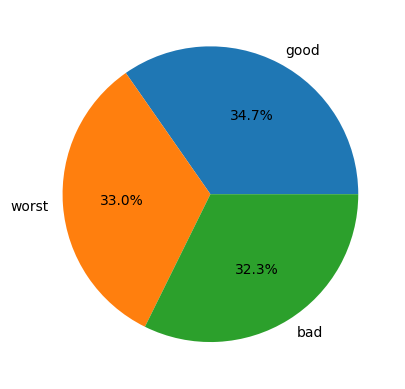

In [5]:
plt.pie(df["review_label"].value_counts(),labels=df["review_label"].unique(),autopct="%1.1f%%")
plt.show()

In [6]:
X=df["review_text"]
y=df["review_label"]

In [7]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk

In [8]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [12]:
stop_words=set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [13]:
stemmer=PorterStemmer()

In [14]:
def clean_text(text):
  text=text.lower()
  text=text.translate(str.maketrans("","",string.punctuation))
  word=text.split()
  word=[stemmer.stem(word) for word in word if word not in stop_words]
  return ' '.join(word)

In [15]:
clean_text("Hello This is an loveble, i eat to love apple in my apple phone i can play game")

'hello lovebl eat love appl appl phone play game'

In [16]:
clean_text("Hello there is a  good girl.")

'hello good girl'

In [17]:
X[0]

'Good value for money. Highly recommend! Very useful and easy to use. Five stars!'

In [18]:
clean_text(X[0])

'good valu money highli recommend use easi use five star'

In [19]:
X = X.apply(clean_text)

In [20]:
X.sample()

,review_text
293,cheap qualiti disappoint disappoint wast money...


In [21]:
#X and Y

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF = TfidfVectorizer()

In [23]:
X = TFIDF.fit_transform(X)
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5980 stored elements and shape (1000, 51)>

In [24]:
X =X.toarray()

In [25]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X,y)

MultinomialNB()

In [26]:
MNB.score(X,y)

0.997

In [27]:
MNB.predict(TFIDF.transform(["product quality is not that good"]))

array(['good'], dtype='<U5')

EDA - Exploratory Data Analysis
df.info() → check for nulls

df['review_label'].value_counts().plot(kind='bar')

df['review_text'].str.len().hist() → text length distribution

WordCloud for positive/negative reviews:

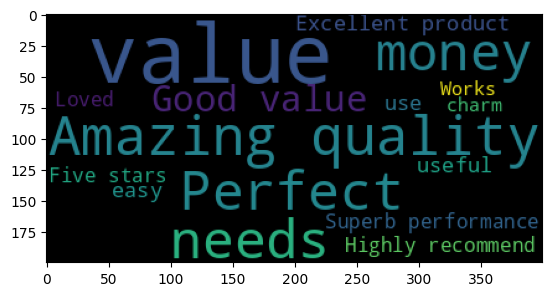

In [28]:
from wordcloud import WordCloud
text = " ".join(df[df['review_label']=='good']['review_text'])
plt.imshow(WordCloud().generate(text))


Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
MNB.fit(X_train, y_train)
MNB.score(X_test, y_test)  # Real accuracy

0.99

In [30]:
#Classification Report & Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
y_pred = MNB.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71  0  2]
 [ 0 57  0]
 [ 0  0 70]]
              precision    recall  f1-score   support

         bad       1.00      0.97      0.99        73
        good       1.00      1.00      1.00        57
       worst       0.97      1.00      0.99        70

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [31]:
#tried Multiple Models to Compare Scores

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "NaiveBayes": MultinomialNB(),
    "Logistic": LogisticRegression(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name}: {model.score(X_test, y_test)}")

NaiveBayes: 0.99
Logistic: 0.99
SVM: 0.99
RandomForest: 0.99


In [32]:
#created a pipeline for cleaner code

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

pipe.fit(df['review_text'], y)
pipe.predict(["worst product ever"])

array(['worst'], dtype='<U5')

In [33]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [34]:
#app.py
import streamlit as st
review = st.text_area("Enter Review")
if st.button("Predict"):
    label = model.predict([review])[0]
    st.write("Sentiment:", label)

2025-07-06 16:18:21.355 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 16:18:21.357 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 16:18:21.361 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 16:18:21.362 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 16:18:21.365 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-07-06 16:18:21.367 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

In [36]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
